In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from pathlib import Path
import preproc as pp

import numpy as np
import tensorflow as tf

version = "v2"
augp = Path("../scratch").joinpath("train_augmented_" + version)
modelp = Path("../scratch").joinpath("models")

train_ir, test_ir = pp.load_data(val_size=0)
train_aug, test_aug = pp.load_aug_data(augp, train_ir.element_spec, test_ind=[3])

2023-02-25 14:27:28.955802: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-25 14:27:52.060987: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-25 14:27:52.234822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:ca:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.41GiB deviceMemoryBandwidth: 1.41TiB/s
2023-02-25 14:27:52.234848: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-25 14:27:52.241304: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-25 14:27:52.241359: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas

# Simple

In [3]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(inputs)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=2
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=2
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(
    1048
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(
    1048
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
net = tf.keras.Model(inputs=inputs, outputs=outputs)
net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         65664 

2023-02-25 14:29:58.559619: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-25 14:29:58.559641: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-25 14:29:58.559665: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-02-25 14:29:58.566466: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.11.1
2023-02-25 14:29:58.692482: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-25 14:29:58.692591: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/50


2023-02-25 14:29:59.420247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-25 14:29:59.423835: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-02-25 14:29:59.536931: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-25 14:30:00.318106: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-02-25 14:30:04.575770: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


  1/844 [..............................] - ETA: 1:55:24 - loss: 3.0187 - accuracy: 0.1055

2023-02-25 14:30:06.819337: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  2/844 [..............................] - ETA: 14:15 - loss: 2.9864 - accuracy: 0.1147  

2023-02-25 14:30:07.172827: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-25 14:30:07.172846: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-25 14:30:07.972626: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-02-25 14:30:07.973062: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-02-25 14:30:08.023831: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 280 callback api events and 268 activity events. 
2023-02-25 14:30:08.033700: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-25 14:30:08.064033: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: simple_logs/train/plugins/profile/2023_02_25_14_30_08
2023-02-25 14:30:08.083933: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzip

844/844 [==============================] - 30s 26ms/step - loss: 0.7712 - accuracy: 0.7572 - val_loss: 0.2672 - val_accuracy: 0.9250
Epoch 2/50
844/844 [==============================] - 25s 24ms/step - loss: 0.1367 - accuracy: 0.9582 - val_loss: 0.1060 - val_accuracy: 0.9672
Epoch 3/50
844/844 [==============================] - 25s 24ms/step - loss: 0.0958 - accuracy: 0.9706 - val_loss: 0.0798 - val_accuracy: 0.9748
Epoch 4/50
844/844 [==============================] - 24s 23ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0549 - val_accuracy: 0.9824
Epoch 5/50
844/844 [==============================] - 24s 23ms/step - loss: 0.0630 - accuracy: 0.9802 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 6/50
844/844 [==============================] - 24s 23ms/step - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0390 - val_accuracy: 0.9876
Epoch 7/50
844/844 [==============================] - 24s 23ms/step - loss: 0.0483 - accuracy: 0.9843 - val_loss: 0.0590 - val_accuracy: 0.9816
Epo

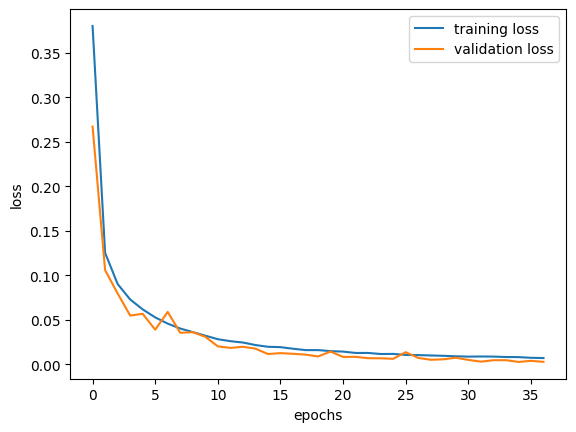

In [4]:
train_shape = tf.data.experimental.cardinality(train_aug).numpy()
val_size = 0.2

splitter = train_aug.shuffle(100000, reshuffle_each_iteration=True)
val_ds = splitter.take(train_shape * val_size).batch(512)
train_ds = splitter.skip(train_shape * val_size).batch(512)

net.compile(
    loss='categorical_crossentropy'
    # , optimizer=tf.keras.optimizers.SGD(nesterov=True, momentum=0.9)
    , optimizer="adam"
    , metrics=["accuracy"]
)

history = net.fit(
    train_ds
    , validation_data=val_ds
    , epochs=50
    , callbacks=[
        tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=5)
        # , tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-5)
        , tf.keras.callbacks.TensorBoard(log_dir="simple_logs", histogram_freq=1, write_graph=True, write_images=True)
    ]
)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [7]:
augp = Path("../scratch").joinpath("train_augmented_v1")
# epochs=1
train_aug, test_aug = pp.load_aug_data(augp.resolve(), train_ir.element_spec, test_ind=[1,2,3,4,6,7,8,9])
_ = net.fit(
    train_ir.concatenate(train_aug).shuffle(100000, reshuffle_each_iteration=True).batch(512)
    , validation_data=test_aug.batch(512)
    , epochs=1
)

352/352 [==============================] - 20s 50ms/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.0185 - val_accuracy: 0.9945


In [8]:
net.evaluate(train_ir.batch(512)), net.evaluate(test_ir.batch(512))

20/20 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9949


([0.006715245079249144, 0.9980499744415283],
 [0.016973167657852173, 0.9948999881744385])

In [9]:
net.evaluate(train_ds), net.evaluate(val_ds), net.evaluate(test_aug.batch(512))

938/938 [==============================] - 12s 13ms/step - loss: 0.0185 - accuracy: 0.9945


([0.020504184067249298, 0.9934606552124023],
 [0.025585129857063293, 0.991527795791626],
 [0.018462104722857475, 0.9945312738418579])

In [10]:
net.save(modelp.joinpath("simple."+version+".h5").resolve().as_posix(), save_format="h5")